# SIT744 Practical 3: Introduction to Keras


*Prof. Antonio Robles-Kelly*




<div class="alert alert-info">
We suggest that you run this notebook using Google Colab.
</div>

## Pre-practical readings

- Explore the [TensorFlow Neural Network Playground](https://playground.tensorflow.org/) to understand intuitively how a neural network works
- Go through this [notebook](https://github.com/alzayats/Google_Colab/blob/master/2_1_a_first_look_at_a_neural_network.ipynb) for an overview of building neural-network models in Keras.




## Task 1. Use Google Drive with Google Colab





When you use Google Colab, you are allocated a virtual machine and your data on the machine will be lost once you disconnect. Therefore you should **keep your notebook, data, and program outputs in Google Drive**.

To mount your Google Drive, you can use the "Mount/Unmount Drive" button in the `Files` tab.


<img src="https://i.stack.imgur.com/Rj69d.png" alt="Mount/Unmount Drive"  width="400"/>

Alternatively, you can run the following code segment.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

Then

- click the URL to log into your Google account
- copy the authorization code
- enter the code in the input box above.

(See more information [here](https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/).)

**exercise**: Mount your Google Drive and create a folder for storing your notebooks, another folder for your data, and a folder for saving your models.

## Task 2 Introduction to Keras

Keras is the default high-level API for TensorFlow 2.x. For most jobs, Keras is often adequate.



Let's first import TensorFlow and Keras.

In [51]:

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
# print(keras.__version__)

2.16.2


### Task 2.1 Prepare training and testing data for TensorFlow

Keras comes with a set of common datasets. There are already processed to be used for training Keras models.

In [52]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
train_labels.shape

(60000,)

In [55]:
test_images.shape

(10000, 28, 28)

In [56]:
test_labels.shape

(10000,)

**exercise**: Find out how many datasets are included in `keras.datasets`.



In [57]:
# @title
from tensorflow.keras import datasets

# List all attributes in the datasets module
dataset_list = dir(datasets)  #list all attributes, methods, and datasets

# Filter out all the private attributes (those that start with "__")
public_dataset_list = [dataset for dataset in dataset_list if not dataset.startswith("__")]

# Now, public_dataset_list contains all the public datasets available
number_of_datasets = len(public_dataset_list)

print("Number of datasets in keras.datasets:", number_of_datasets)
print("Datasets names:", public_dataset_list)


Number of datasets in keras.datasets: 8
Datasets names: ['boston_housing', 'california_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


You can see that this dataset is a collection of NumPy arrays. This is very similar for how you prepare data for training a machine learning model in scikit-learn.

**exercise**: Find out the shape of the features (images) and labels. How many unique labels are in the training data and the testing data?

In [58]:
# @title
import numpy as np
print(len(np.unique(train_labels)))
print(len(np.unique(test_labels)))

10
10


Let's have a look at the first image.

In [59]:
import IPython.display
import PIL.Image
IPython.display.display(PIL.Image.fromarray(train_images[0]))

Here, we reshape the images into 1-D NumPy arrays as we will be only using Dense layers. This is not always necessary or desirable if we use other layer types that expect 2-D or 3-D **tensors** as inputs.   

In [60]:

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

Next we normalise the input data. Such  a normalisation step can also be done inside the model through a batch-normalisation layer.

In [61]:

train_images = train_images.astype('float32') / 255  #[0,255]->[0,1]
test_images = test_images.astype('float32') / 255


Note how we convert the input to `float32`. For the output, we also encode it using one-hot encoding.

In [62]:

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)   ## convert the label into categorical using onehot
test_labels = to_categorical(test_labels)

In [63]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**qestion**: What is the shape of the output now?

In [64]:
test_labels.shape

(10000, 10)

### Task 2.2 Define a Keras model

There are three APIs to create a Keras model:

- Sequential API
- Functional API
- Model subclassing

The Sequential API is the simplest.

In [75]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28, )),
    layers.Dense(10, activation='softmax')])

/Users/xinzheli/miniconda3/envs/learn_dl/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


As shown above, the first layer need to have the `input_shape` defined. The comma at the end is necessary when the input is a 1-D tensor. (Try remove the comma and rerun the code above.)

Now you can visualise the sequential model in terms of its layers.  

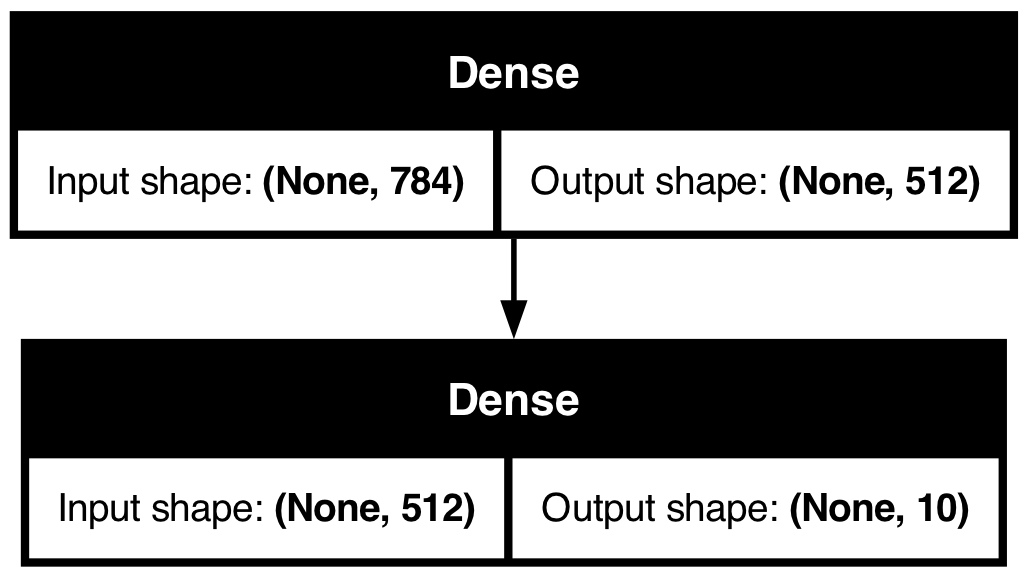

In [66]:

from tensorflow.keras.utils import plot_model
plot_model(network, show_shapes=True)


Note that the input and output tensors of each layer have dynamic shapes. That is why the first dimension (the batch dimension) is marked as `?`.

**question**：What determines the output shape of each layer? The output shape of the last layer is 10. Can it be another value?

**exercise**: Change the input shape of the above network to 32x32 and then visualise the network layers.

### Task 2.3 Compile the model

Now we are ready to set up the model for training. We need to specify the following three things:

1. A loss function, which compares the model outputs against the training labels to provide training feedback.
2. An optimiser, which uses the gradients of the loss function over model parameters to adjust parameter values.
3. Metrics that we like to monitor during the training process.




In [77]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Metrics are often different from the loss function. In the example above, the metric is accuracy while the loss is the cross-entropy.

**question**: Why do we need metrics different from the loss function? Can we always use a metric to replace the loss function?



### Task 2.4 Training the model

Once the network is defined and compiled, the training can start.

In [68]:
# save the initial weights for later experiments
init_weights = network.get_weights()

history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8780 - loss: 0.4327
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9646 - loss: 0.1186
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9779 - loss: 0.0719
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9857 - loss: 0.0497
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9882 - loss: 0.0374


The loss function and training metrics can be recorded and visualised as below.

In [71]:
len(history.history['loss'])

5

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


**question** Do you see overfitting from the plot above?

**exercise** In the above example, try a different batch size. How does the training speed change?

### Task 2.5 Check model performance via test set

In the end, you have to rely on the test dataset to assess the true model accuracy.

In [72]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9764 - loss: 0.0778
test_loss: 0.06649751961231232
test_acc: 0.9797000288963318


The difference between train_loss and test_loss is called the **generalisation gap**. It is a measure of overfitting. We will later see how overfitting can be addressed by regularisation.

## Task 3 Use TensorBoard callbacks to monitor training

Last week, we saw how `tf.summary` API can be used to log metrics. With Keras, TensorBoard logging can be much easier through callbacks.


In [78]:
!rm -rf ./logs/

from datetime import datetime
import os

root_logdir = "logs"
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id)

callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir,
        histogram_freq=1
    )
]


history = network.fit(train_images,
                      train_labels,
                      epochs=2,
                      batch_size=128,
                      callbacks=callbacks)


Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8763 - loss: 0.4317
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9655 - loss: 0.1152


Now you can visualise the loss, the training metrics, the model graph, and even the histograms for each layers' activations.


In [79]:
# @title
%reload_ext tensorboard
%tensorboard --logdir=logs


Reusing TensorBoard on port 6006 (pid 15333), started 18:01:56 ago. (Use '!kill 15333' to kill it.)

**question** Inspect the graphs in TensorBoard. How is it different from the graph generated from the `plot_model` function above.

## Additional resources

- Official [Keras overview](https://keras.io/about/)